In [93]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Load the data from the CSV file
df = pd.read_csv('extracted_values.csv')
df2 = pd.read_csv('extracted_values_alex.csv')

In [95]:
output_directory = './img/'

# Define a function to save plots with directory and filename
def save_plot_as_image(plot, filename):
    # Create the directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Construct the full file path
    file_path = os.path.join(output_directory, filename)
    
    # Save the plot as an image
    plot.savefig(file_path, bbox_inches='tight', dpi=300)  # Adjust dpi and other settings as needed
    plt.close()

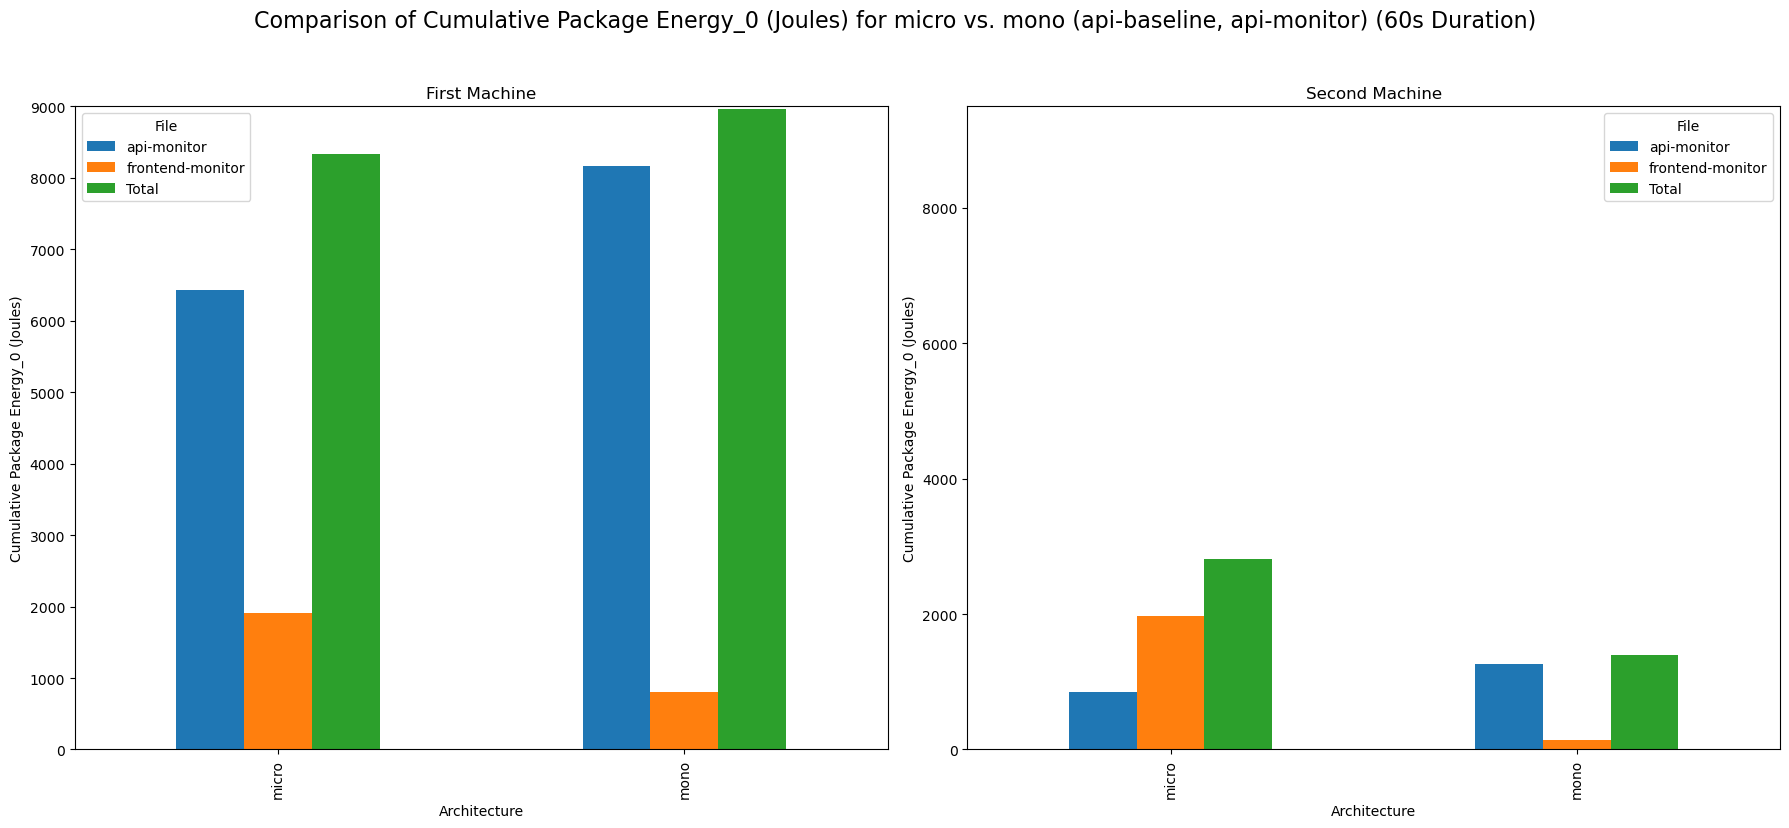

In [98]:
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# First Plot
# Filter the DataFrame to include only "api-baseline" and "api-monitor"
filtered_df = df[df["File"].isin(["frontend-monitor", "api-monitor"])]

# Group the filtered DataFrame by "Architecture" and "File" and sum the values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].sum().unstack(fill_value=0)

# Calculate the total of "api-baseline" and "api-monitor"
grouped_df["Total"] = grouped_df["frontend-monitor"] + grouped_df["api-monitor"]

# Plot the first bar chart
grouped_df.plot(kind="bar", stacked=False, ax=axs[0])
axs[0].set_xlabel("Architecture")
axs[0].set_ylabel("Cumulative Package Energy_0 (Joules)")
# axs[0].set_title("Comparison of sum of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (60s Duration)")
axs[0].set_title("First Machine")
axs[0].legend(title="File")
axs[0].set_ylim(0, 9000)

# Second Plot
# Filter the DataFrame to include only "api-baseline" and "api-monitor"
filtered_df = df2[df2["File"].isin(["frontend-monitor", "api-monitor"])]

# Group the filtered DataFrame by "Architecture" and "File" and sum the values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].sum().unstack(fill_value=0)

# Calculate the total of "api-baseline" and "api-monitor"
grouped_df["Total"] = grouped_df["frontend-monitor"] + grouped_df["api-monitor"]

# Plot the second bar chart
grouped_df.plot(kind="bar", stacked=False, ax=axs[1])
axs[1].set_xlabel("Architecture")
axs[1].set_ylabel("Cumulative Package Energy_0 (Joules)")
# axs[1].set_title("[Second Machine] Comparison of sum of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (60s Duration)")
axs[1].set_title("Second Machine")
axs[1].legend(title="File")
axs[1].set_ylim(0, 9500)

fig.suptitle("Comparison of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (60s Duration)", fontsize=16, y=1.03)

plt.tight_layout()

plt.savefig(os.path.join(output_directory, 'sum_combined.png'), bbox_inches='tight', dpi=300)
plt.show()



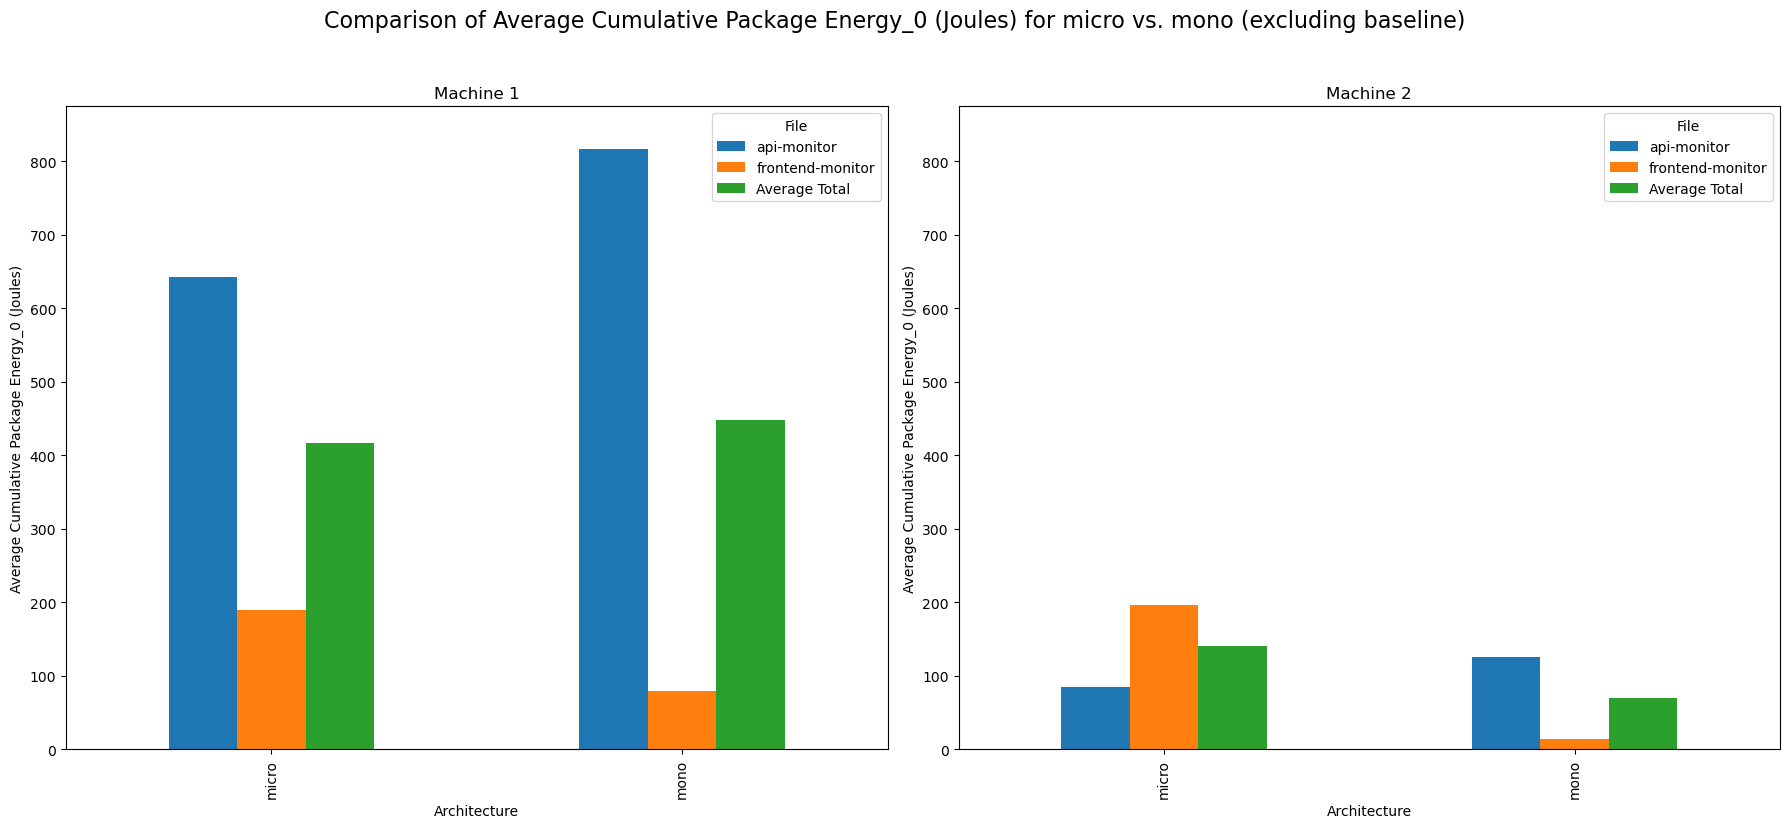

In [100]:
# import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# First Plot (Machine 1)
# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
filtered_df = df

# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = filtered_df[~filtered_df["File"].str.contains("baseline")]

# Group the filtered DataFrame by "Architecture" and "File" and calculate the average values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].mean().unstack(fill_value=0)

# Calculate the average total energy consumption for each architecture
grouped_df["Average Total"] = grouped_df.mean(axis=1)

# Plot the first bar chart (Machine 1)
grouped_df.plot(kind="bar", stacked=False, ax=axs[0])
axs[0].set_xlabel("Architecture")
axs[0].set_ylabel("Average Cumulative Package Energy_0 (Joules)")
axs[0].set_title("Machine 1")
axs[0].legend(title="File")
axs[0].set_ylim(0, 875)

# Second Plot (Machine 2)
# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
filtered_df = df2

# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = filtered_df[~filtered_df["File"].str.contains("baseline")]

# Group the filtered DataFrame by "Architecture" and "File" and calculate the average values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].mean().unstack(fill_value=0)

# Calculate the average total energy consumption for each architecture
grouped_df["Average Total"] = grouped_df.mean(axis=1)

# Plot the second bar chart (Machine 2)
grouped_df.plot(kind="bar", stacked=False, ax=axs[1])
axs[1].set_xlabel("Architecture")
axs[1].set_ylabel("Average Cumulative Package Energy_0 (Joules)")
axs[1].set_title("Machine 2")
axs[1].legend(title="File")
axs[1].set_ylim(0, 875)

# Set main title
fig.suptitle("Comparison of Average Cumulative Package Energy_0 (Joules) for micro vs. mono (excluding baseline)", fontsize=16, y=1.03)

# Set the layout
plt.tight_layout()

# Save the combined plot as an image
# output_directory = '/path/to/your/directory'
plt.savefig(os.path.join(output_directory, 'avg_combined.png'), bbox_inches='tight', dpi=300)
plt.show()


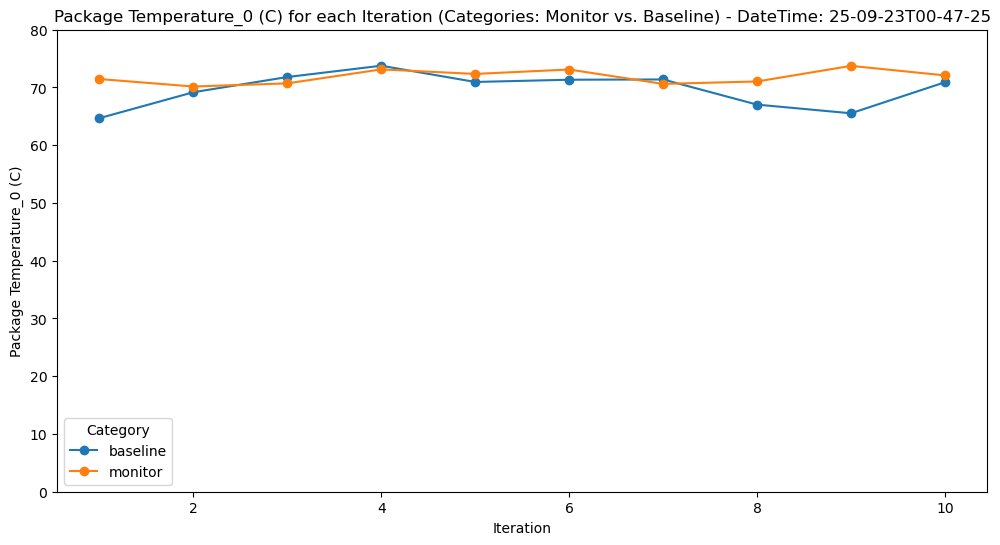

In [ ]:
# Extract the category ("baseline" or "monitor") based on the "File" column
df["Category"] = df["File"].apply(lambda x: "baseline" if "baseline" in x else "monitor")

# Extract the component ("API" or "frontend") based on the "File" column
df["Component"] = df["File"].str.split("-").str[1]

# Group by "#", "Category", and "Component" and sum the " Package Temperature_0 (C)" values
grouped_df = df.groupby(["#", "Category", "Component"])[" Package Temperature_0 (C)"].mean().reset_index()

# Pivot the grouped data to create separate columns for "monitor" and "baseline" categories
pivoted_df = grouped_df.pivot_table(index="#", columns="Category", values=" Package Temperature_0 (C)", aggfunc="mean")

# Plot a line chart for "monitor" and "baseline" Package Temperature_0 (C) at each unique iteration
pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("Package Temperature_0 (C) for each Iteration (Categories: Monitor vs. Baseline) - DateTime: 25-09-23T00-47-25")
plt.legend(title="Category")
plt.ylim(0, 80)

plt.show()

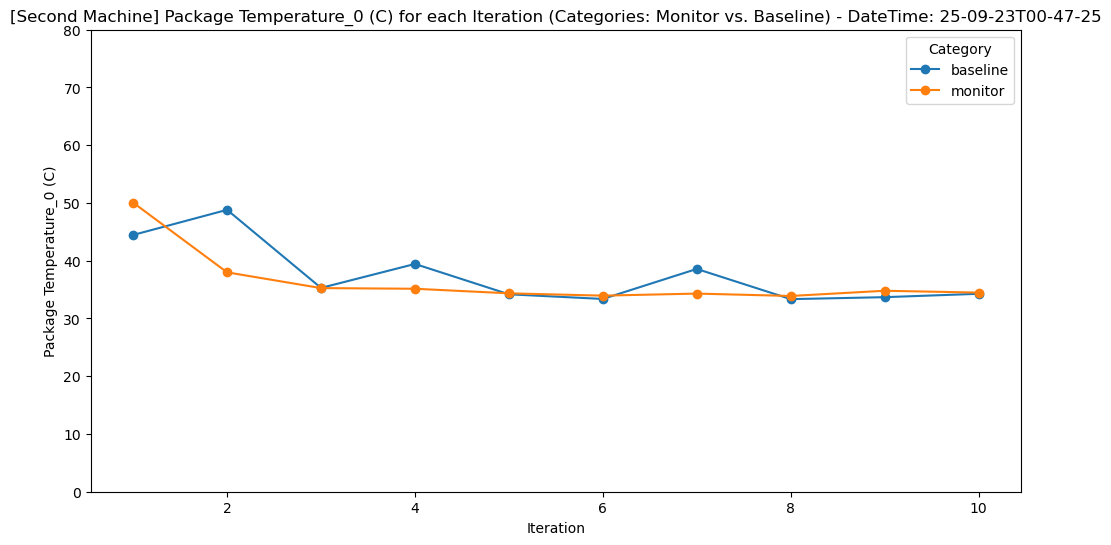

In [ ]:
# Extract the category ("baseline" or "monitor") based on the "File" column
df2["Category"] = df2["File"].apply(lambda x: "baseline" if "baseline" in x else "monitor")

# Extract the component ("API" or "frontend") based on the "File" column
df2["Component"] = df2["File"].str.split("-").str[1]

# Group by "#", "Category", and "Component" and sum the " Package Temperature_0 (C)" values
grouped_df = df2.groupby(["#", "Category", "Component"])[" Package Temperature_0 (C)"].mean().reset_index()

# Pivot the grouped data to create separate columns for "monitor" and "baseline" categories
pivoted_df = grouped_df.pivot_table(index="#", columns="Category", values=" Package Temperature_0 (C)", aggfunc="mean")

# Plot a line chart for "monitor" and "baseline" Package Temperature_0 (C) at each unique iteration
pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("[Second Machine] Package Temperature_0 (C) for each Iteration (Categories: Monitor vs. Baseline) - DateTime: 25-09-23T00-47-25")
plt.legend(title="Category")
plt.ylim(0, 80)
plt.show()

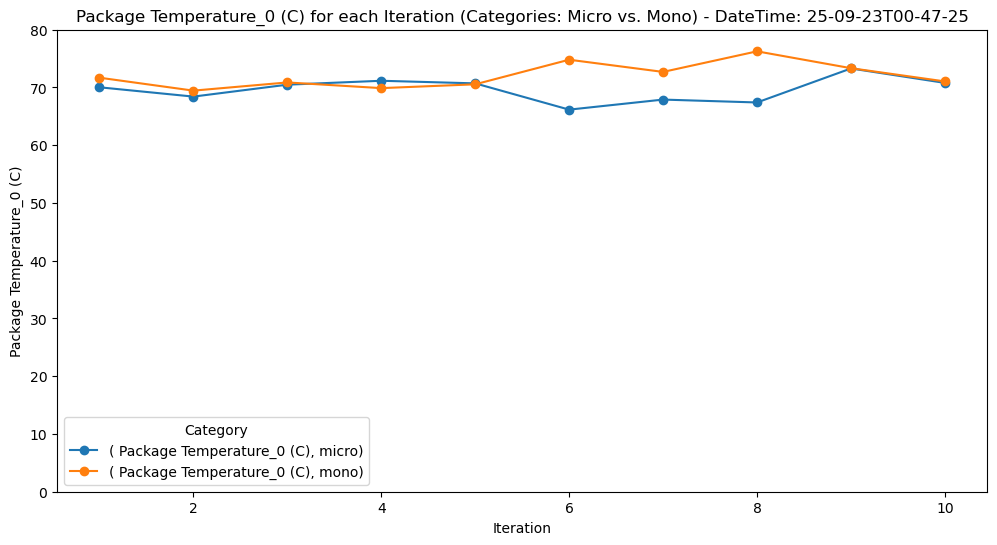

In [ ]:
filtered_df = df[~df["File"].str.contains("baseline")]
filtered_df = filtered_df[~filtered_df["File"].str.contains("frontend")]


pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values=" Package Temperature_0 (C)", aggfunc="sum").unstack()

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("Package Temperature_0 (C) for each Iteration (Categories: Micro vs. Mono) - DateTime: 25-09-23T00-47-25")
plt.legend(title="Category")
plt.ylim(0, 80)

plt.show()

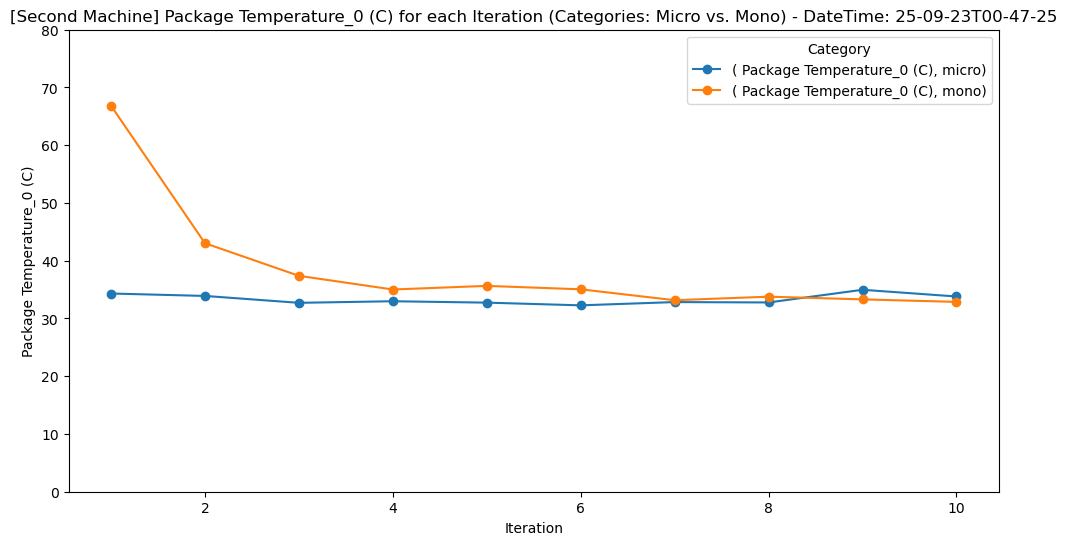

In [ ]:
filtered_df = df2[~df["File"].str.contains("baseline")]
filtered_df = filtered_df[~filtered_df["File"].str.contains("frontend")]


pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values=" Package Temperature_0 (C)", aggfunc="sum").unstack()

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("[Second Machine] Package Temperature_0 (C) for each Iteration (Categories: Micro vs. Mono) - DateTime: 25-09-23T00-47-25")
plt.legend(title="Category")
plt.ylim(0, 80)
plt.show()

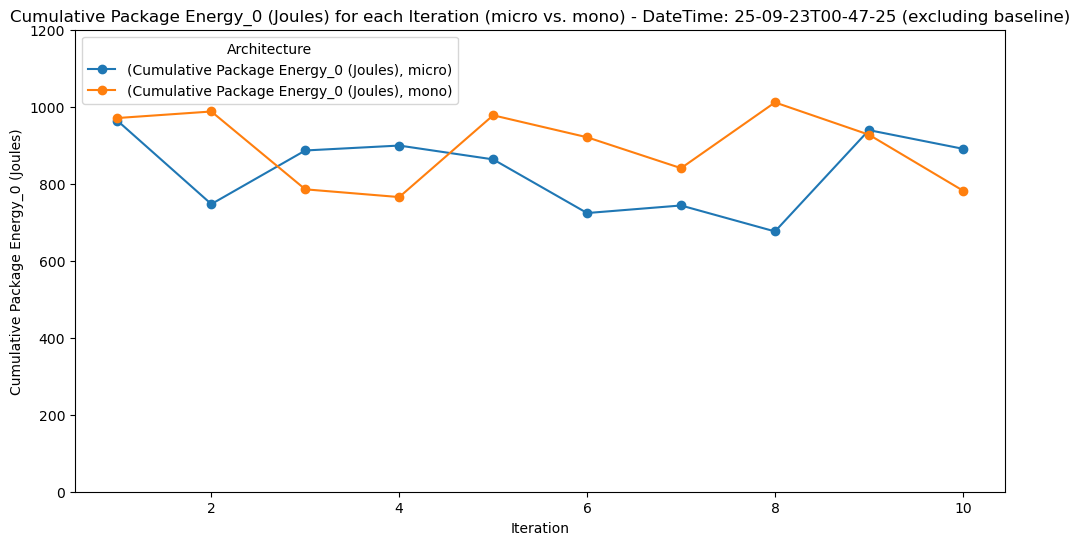

In [ ]:
filtered_df = df[~df["File"].str.contains("baseline")]

pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values="Cumulative Package Energy_0 (Joules)", aggfunc="sum").unstack()

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Cumulative Package Energy_0 (Joules)")

plt.title("Cumulative Package Energy_0 (Joules) for each Iteration (micro vs. mono) - DateTime: 25-09-23T00-47-25 (excluding baseline)")
plt.legend(title="Architecture")
plt.ylim(0, 1200)
plt.show()

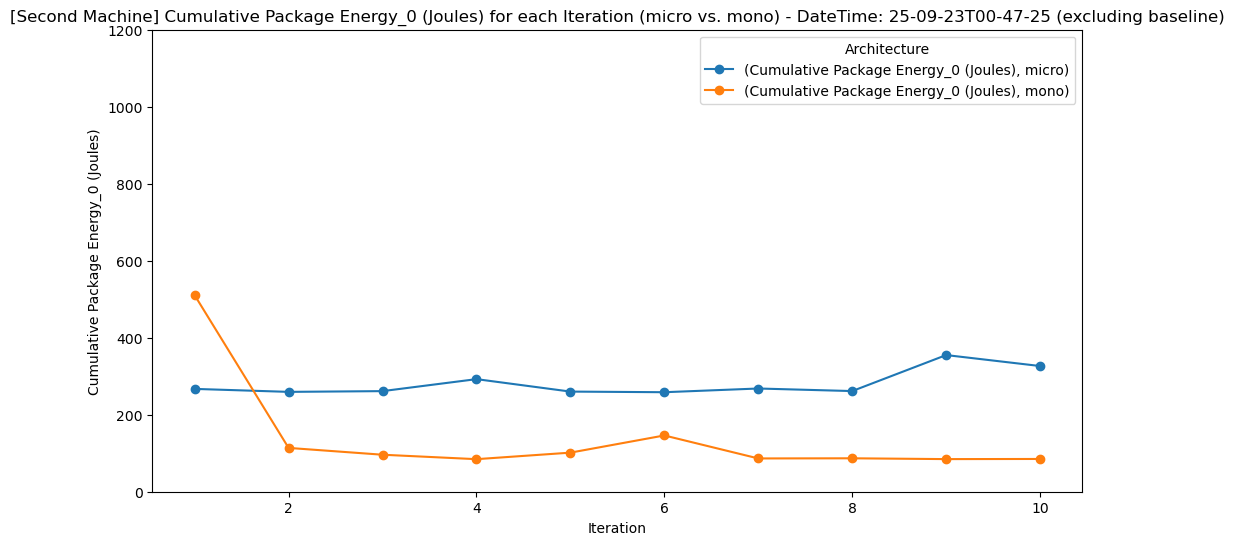

In [ ]:
filtered_df = df2[~df2["File"].str.contains("baseline")]

pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values="Cumulative Package Energy_0 (Joules)", aggfunc="sum").unstack()

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Cumulative Package Energy_0 (Joules)")

plt.title("[Second Machine] Cumulative Package Energy_0 (Joules) for each Iteration (micro vs. mono) - DateTime: 25-09-23T00-47-25 (excluding baseline)")
plt.legend(title="Architecture")
plt.ylim(0, 1200)
plt.show()